# <p style="text-align: center;"> FIFA 19 </p>

In [2]:
from IPython.display import HTML
from IPython.display import Image
Image(url= "http://www.techhuman.com/wp-content/uploads/2018/10/FIFA-19-Wallpaper-4-1080x675.jpg")

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>
- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
   - ### 1.2 [Importing Libraries](#importing_libraries)
   - ### 1.3 [Dataset Summary](#dataset_summary)
   - ### 1.4 [Dataset Cleaning](#dataset_cleaning)
   - ### 1.5 [Exploratory Data Analysis (EDA)](#eda)
       - ### 1.5.1 [Heatmap](#heatmap)
       - ### 1.5.2 [Regplot](#regplot)
- ## 2. [Linear Regression](#LinearRegression)
    - ### 2.1 [Linear Model 1](#LinearModel1)
    - ### 2.2 [Linear Model 2](#LinearModel2)
    - ### 2.3 [Linear Model 3](#LinearModel3)
    - ### 2.4 [Linear Model 3](#LinearModel3)
- ## 3. [Logistic Regression](#LogisticRegression)
    - ### 3.1 [Logistic Model 1](#LogisticModel1)
    - ### 3.2 [Logistic Model 2](#LogisticModel2)
    - ### 3.3 [Logistic Model 3](#LogisticModel3)
- ## 4. [Multicollinearity](#Multicollinearity)
- ## 5. [Stepwise Regression](#StepwiseRegression)
- ## 6. [Interaction Effect](#InteractionEffect)
    - ### 6.1 [All Columns](#AllColumns)
    - ### 6.2 [International Reputation](#InternationalReputation)
    - ### 6.3 [Age](#Age)
    - ### 6.4 [Potential](#Potential)
    - ### 6.5 [International Reputation & Age](#InternationalReputation&Age)
    - ### 6.6 [International Reputation & Potential](#InternationalReputation&Potential)
    - ### 6.7 [Age & Potential](#Age&Potential)
    - ### 6.8 [Age & Potential Interaction](#Age&PotentialInteraction)
- ## 7. [Regularization](#Regularization)
- ## 8. [Conclusion](#Conclusion)
- ## 9. [Contribution](#Contribution)
- ## 10. [Citation](#Citation)
- ## 11. [License](#License)

# <p style="text-align: center;"> Introduction </p> <a id='Introduction'></a>

#   1.1 Abstract  <a id='abstract'></a>
FIFA 19 is a dataset by Karan Gadiya, which contains list of attributes of players like Name, Age, Nationality, Overall, Wage etc. The main focus of this project is learning about modeling of data by supervised algorithms i.e (Linear Regression (regression) and Logistic Regression (classification)). The main focus of this particular kernel is FIFA 19, and factors that affects Overall. Also in the following project there is a brief explanation of how combination of the independent variables (Interaction effect) has what impact on dependent variable and how is the accuracy of the model has been changed because of the same and how interdependence/ correlation (Multicollinearity) between various independent variable has adverse effect on the dependent varaiable and given data model. The solution to the problems of multicollinearity is also been discussed in the following kernel i.e Regularization and Stepwise Regression. Both of which gives us an enhanced model , with better predictors and estimators in alignment with dependent variable. Furthermore, following kernel contains some EDA(Explorartory Data Analysis) which is usually the first step in your data analysis process. We take a broader look at patterns, trends, outliers, unexpected results and so on in the dataset, using visual and quantitative methods to get a sense of the story it tells. 


#   1.2 Importing Libraries  <a id='importing_libraries'></a>
In this step we import a few libraries that are required in our program. Some major libraries that are used are Numpy, Pandas, MatplotLib, Seaborn and sklearn.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from pandas.plotting import scatter_matrix as sm

import os

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm as cm

import scipy.stats  as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings; warnings.simplefilter('ignore')

fifa_dataset = pd.read_csv("FullData.csv")

#   1.3 Dataset Summary  <a id='dataset_summary'></a>
Here we are looking at the top 5 rows of the dataset to view, what type of dataset it is. We also look at the columns which show the various attributes in the dataset.
[Back to top](#Introduction)

In [4]:
fifa_dataset.head()

,Index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M


### Removing Unnecessary Columns
Now, here we see that there are a few columns which may not be relevant to our analysis, so we'll drop those columns before we proceed.

In [5]:
fifa_dataset.drop(['Index','ID','Photo','Flag','Club Logo','Real Face','Jersey Number','Joined','Loaned From','Contract Valid Until','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'],axis=1,inplace=True)
#'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'
fifa_dataset.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96,33,28,26,6,11,15,14,8,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95,28,31,23,7,11,15,14,11,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94,27,24,33,9,9,15,15,11,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68,15,21,13,90,85,87,88,94,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88,68,58,51,15,13,5,10,13,€196.4M


### Statistical Analysis
Here we are running basic Statistical analysis on the given data to find any abnormal values in the dataset

In [6]:
fifa_dataset.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,4999.000000,4999.000000,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,27.235647,74.599920,76.925385,1793.70154,1.384277,3.113223,2.747750,58.090618,53.350870,59.088418,...,55.301460,68.798760,53.785357,54.018404,51.175635,16.529506,16.320064,16.027606,16.400080,16.620724
std,4.051697,3.735713,4.677583,243.48299,0.659648,0.708085,0.854678,18.999547,20.340079,18.128951,...,16.373557,8.622949,21.367067,23.281849,23.413655,18.939138,18.068928,17.302213,18.540946,19.285211
min,17.000000,70.000000,70.000000,918.00000,1.000000,1.000000,1.000000,6.000000,5.000000,7.000000,...,9.000000,3.000000,7.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,72.000000,73.000000,1720.00000,1.000000,3.000000,2.000000,49.000000,39.000000,52.000000,...,45.000000,65.000000,35.000000,32.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,27.000000,74.000000,76.000000,1846.00000,1.000000,3.000000,3.000000,65.000000,59.000000,64.000000,...,58.000000,69.000000,62.000000,66.000000,61.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,30.000000,76.000000,80.000000,1948.00000,2.000000,4.000000,3.000000,72.000000,70.000000,72.000000,...,68.000000,74.000000,72.000000,74.000000,72.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.00000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
fifa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 53 columns):
Name                        4999 non-null object
Age                         4999 non-null int64
Nationality                 4999 non-null object
Overall                     4999 non-null int64
Potential                   4999 non-null int64
Club                        4928 non-null object
Value                       4999 non-null object
Wage                        4999 non-null object
Special                     4999 non-null int64
Preferred Foot              4999 non-null object
International Reputation    4999 non-null int64
Weak Foot                   4999 non-null int64
Skill Moves                 4999 non-null int64
Work Rate                   4999 non-null object
Body Type                   4999 non-null object
Position                    4999 non-null object
Height                      4999 non-null object
Weight                      4999 non-null object
Crossing          

#   1.4 Dataset Cleaning  <a id='dataset_cleaning'></a>
Next we will check if there are any missing or Null values in the dataset.

[Back to top](#Introduction)

In [8]:
print("Are there Null Values in the dataset? ")
fifa_dataset.isnull().values.any()

Are there Null Values in the dataset? 


True

### Finding the location of Null values
Now that we know that there are missing(null) values in the dataset, we need to find the columns which have missing values and then find the percentage of how much data is missing in those columns to get a better picture.

In [9]:
total = fifa_dataset.isnull().sum()[fifa_dataset.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(fifa_dataset)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Release Clause,449,8.98
Club,71,1.42


### Standardizing the Financial Values
Before we fill in the missing values in our dataset, we first need to standardize our financial values, i.e. since the values are in thousands(K) and millions(M), we need to stardadize them to units place so that analysis can be run on it.

In [10]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0


In [11]:
fifa_dataset['Release Clause'] = fifa_dataset['Release Clause'].str.replace('€', '')  
fifa_dataset['Release Clause'] = fifa_dataset['Release Clause'] .apply(value_to_float)

In [12]:
fifa_dataset['Wage'] = fifa_dataset['Wage'].str.replace('€', '')      
fifa_dataset['Wage'] = fifa_dataset['Wage'] .apply(value_to_float)

In [13]:
fifa_dataset['Value'] = fifa_dataset['Value'].str.replace('€', '')
fifa_dataset['Value'] = fifa_dataset['Value'] .apply(value_to_float)

In [14]:
x=np.array(fifa_dataset['Release Clause'])
Release_Clause_no_nan= fifa_dataset['Release Clause'][~np.isnan(fifa_dataset['Release Clause'])]
y=np.array(Release_Clause_no_nan)

z=fifa_dataset[['Value','Release Clause','Wage']]
print (z)

            Value  Release Clause      Wage
0     110500000.0     226500000.0  565000.0
1      77000000.0     127100000.0  405000.0
2     118500000.0     228100000.0  290000.0
3      72000000.0     138600000.0  260000.0
4     102000000.0     196400000.0  355000.0
5      93000000.0     172100000.0  340000.0
6      67000000.0     137400000.0  420000.0
7      80000000.0     164000000.0  455000.0
8      51000000.0     104600000.0  380000.0
9      68000000.0     144500000.0   94000.0
10     77000000.0     127100000.0  205000.0
11     76500000.0     156800000.0  355000.0
12     44000000.0      90200000.0  125000.0
13     60000000.0     111000000.0  285000.0
14     63000000.0     121300000.0  225000.0
15     89000000.0     153500000.0  205000.0
16     83500000.0     160700000.0  205000.0
17     78000000.0     165800000.0  145000.0
18     58000000.0     123300000.0  240000.0
19     53500000.0     113700000.0  240000.0
20     51500000.0     105600000.0  315000.0
21     60000000.0     111000000.

### Replacing missing values in the dataset
The two columns that have missing values are Release Clause and CLub. Club gives us information about at which club is the player playing. A null value in this column means that the player is currently not employed by any club, and in this case, all Null values should be replaced by the string 'No Club', as the player has no club in which the player is playing. Release Clause in Football is a Clause signed by the player in the contract of the player. 

Release Clause sets the selling value of a player to a certain amount. If any club wishes to buy the said player, then they must pay the Release Clause amount to the club first. After paying the release clause, the club is free to negotiate with the player. When the Release Clause of a player is not mentioned, the club will have to pay an amount close to the value of the player to enter negotiation with the said player, Thus we will replace Null Values in the Release Clause Column by the value of that player.

In [15]:
#Filling Missing Values
for col in fifa_dataset.columns.values:
    if fifa_dataset[col].isnull().sum()==0:
        continue
    if col == 'Release Clause':
        guess_values = fifa_dataset['Release Clause'].fillna(value=fifa_dataset['Value'])
    else:
        guess_values = fifa_dataset['Club'].apply(lambda x: 'No Club')
        
    fifa_dataset[col].loc[(fifa_dataset[col].isnull())] = guess_values
    
   
     #if fifa_dataset['Release Clause'].isna().any():
    #fifa_dataset['Release Clause']. = fifa_dataset['Release Clause'].apply(lambda x: y+1)

    
 

In [16]:
fifa_dataset.isnull().values.any()

False

#   1.5  Exploratory Data Analysis (EDA)  <a id='eda'></a>
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

[Back to top](#Introduction)

##   1.5.1  Heatmap  <a id='heatmap'></a>
In the first step of our EDA we are finding out the correlation among the various attributes of the dataset. Correlation value gives us the measure of linear relationship amongst two numerical quantities. The range of correlation is between -1 and 1.

When two variables have a positive correlation, it means the variables move in the same direction. This means that as one variable increases, so does the other one. In a negative correlation, the variables move in inverse, or opposite, directions. In other words, as one variable increases, the other variable decreases. When the correlation value is 0, no correlation exists between the attributes.

Heatmap is a visual representation of the Correlation. In our heatmap, we show positively correlated values with a shade of red. The shade of red keeps on getting darker as the correlation increases. While the negatively correlated values are shown with a shade of blue, which gets darker as the inverse correlation increases.

Here, we will take a look at a few factors which have high correlation with our dependant variable i.e. Overall so that we can perform various tests on it.

[Back to top](#eda)

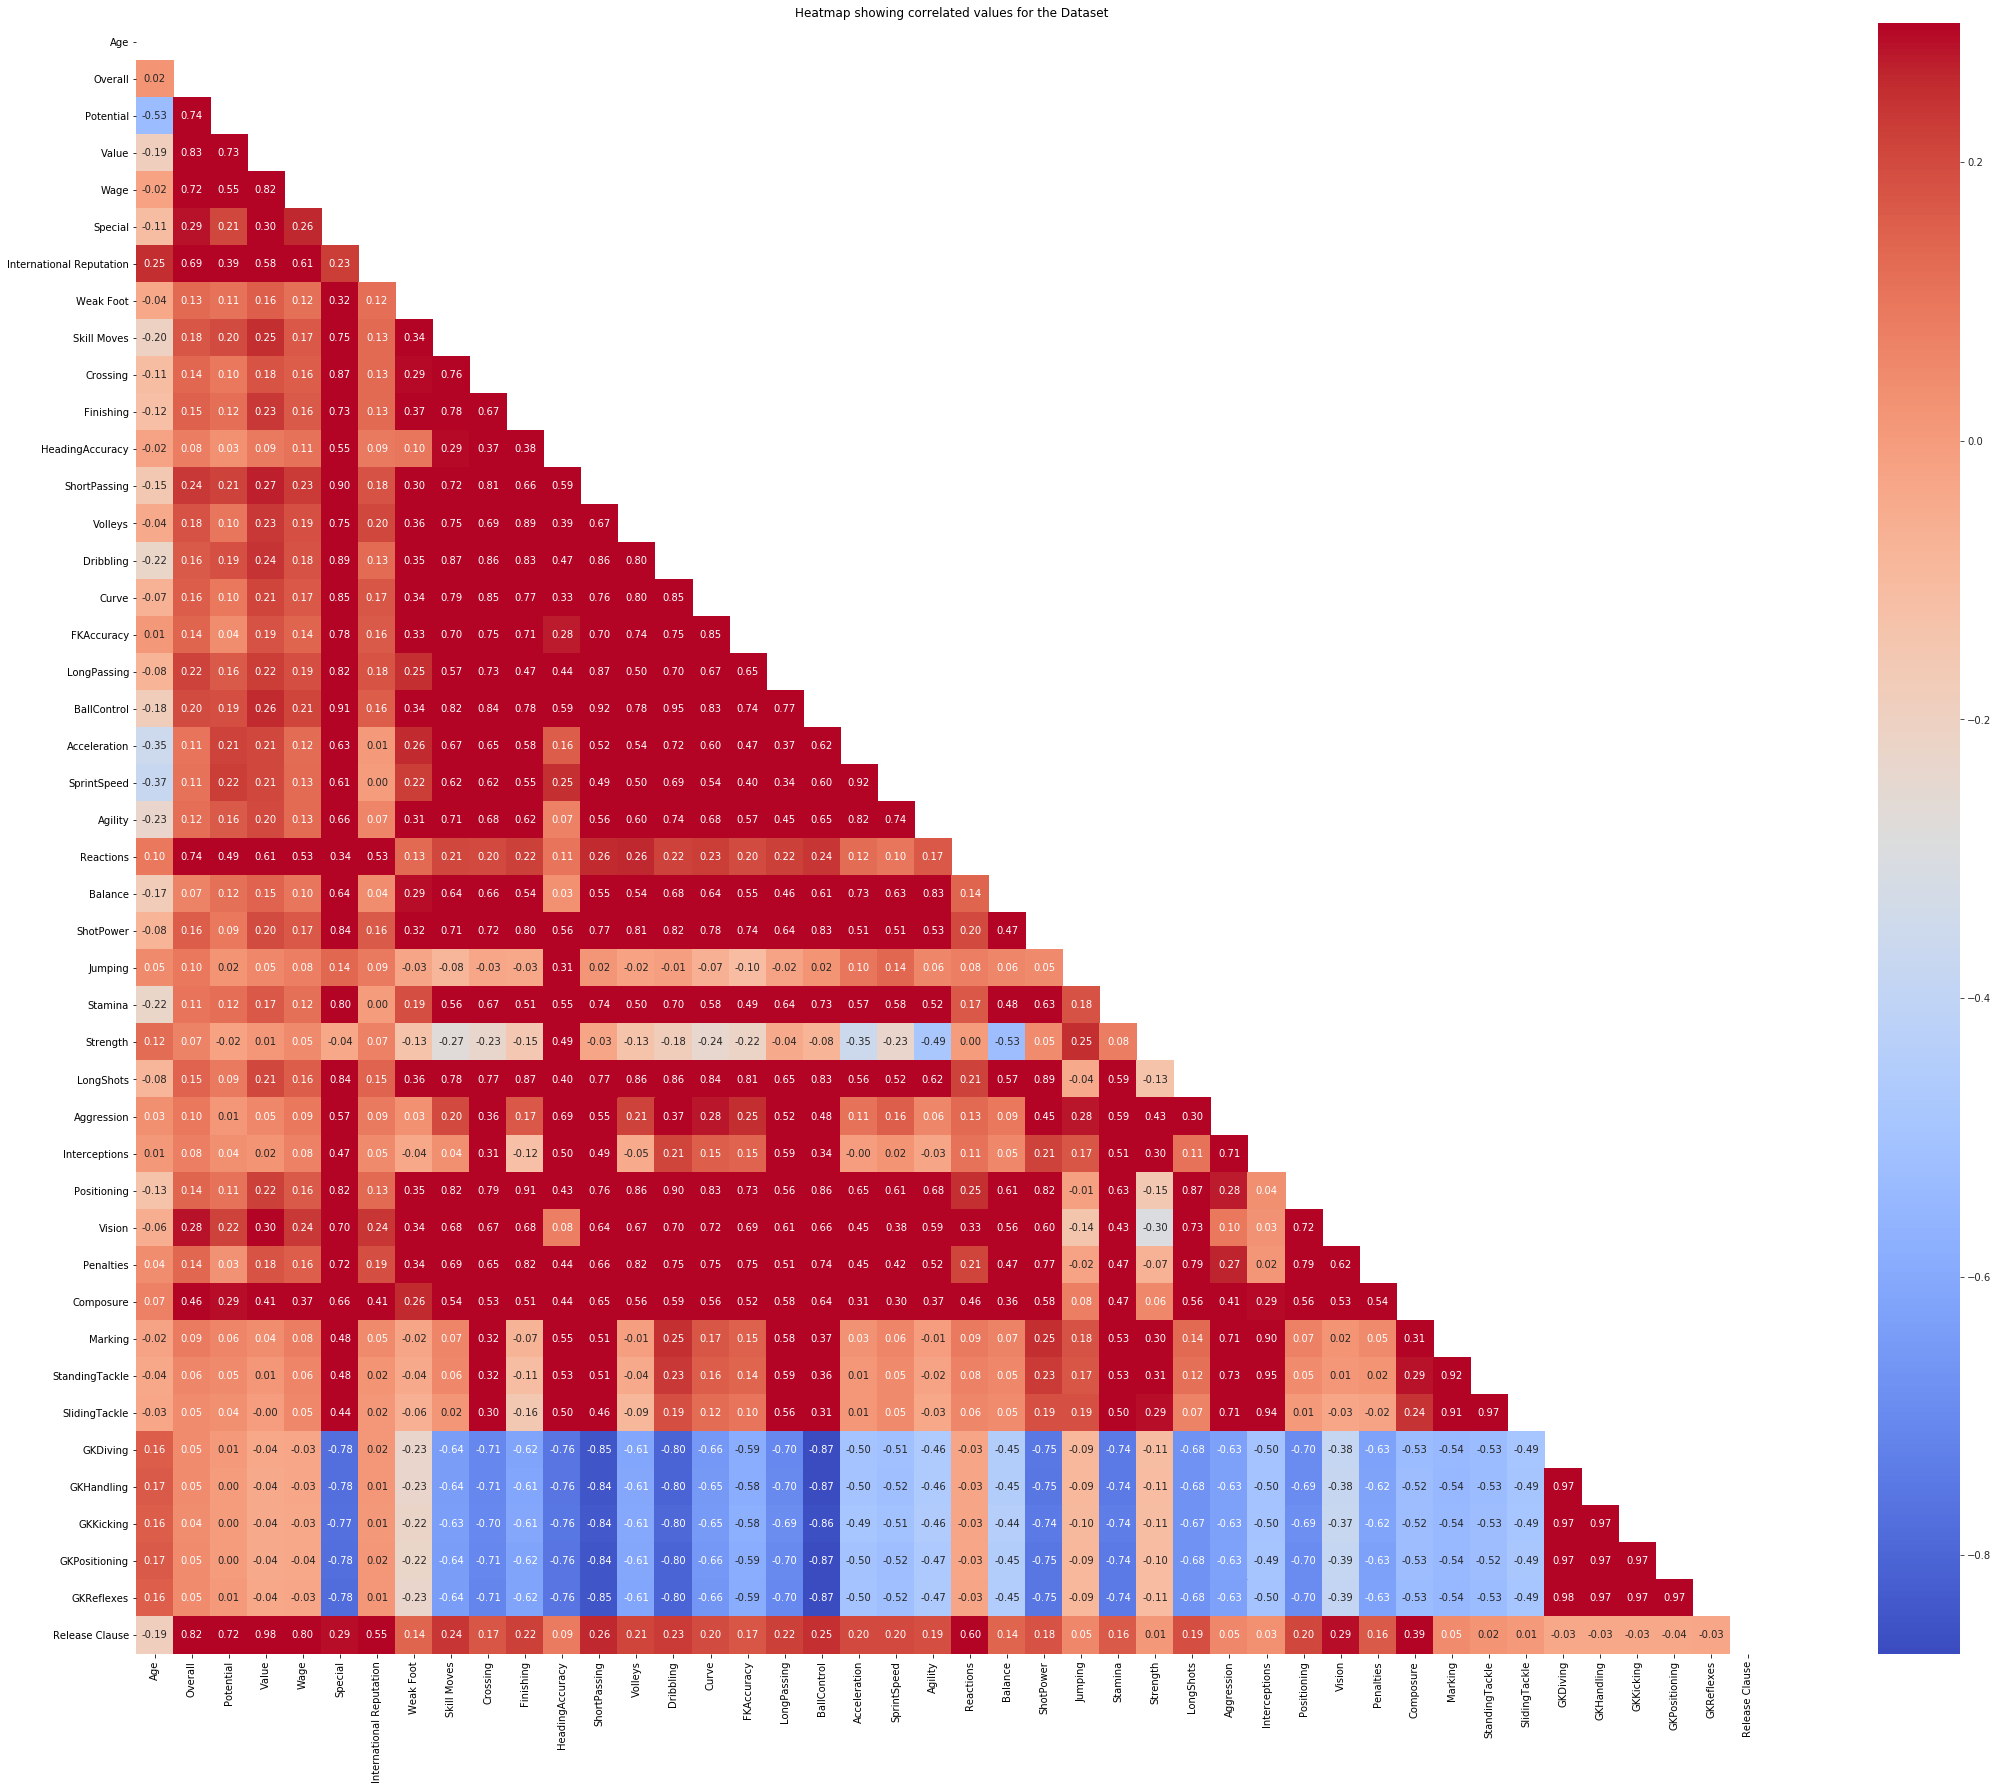

In [17]:
#correlation
fifa_dataset.corr()
plt.figure(figsize=(40,30))
ax=plt.axes()
#sns.heatmap(data=fifa_dataset.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
mask = np.zeros_like(fifa_dataset.iloc[:,:].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data=fifa_dataset.iloc[:,:].corr(), mask=mask, vmax=.3, annot=True,fmt='.2f', square=True, cmap='coolwarm')
    
ax.set_title('Heatmap showing correlated values for the Dataset')
plt.show()


In [18]:
fifa_data_p = fifa_dataset.drop(['Name', 'Nationality', 'Club','Position','Work Rate', 'Preferred Foot' ,'Body Type', 'Height', 'Weight'],axis=1)

corr = fifa_data_p.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_column=fifa_data_p.columns[columns]                
fifa_data_p=fifa_data_p[selected_column]

## Generalizing the Value
The Position column tells us at which position does the player plays. But this column can be further generalized to 'General Position' as it'll help us convert this column into a categorical value.

We also convert the General Position into GP_Label and Preferred_Foot PF_Label to convert the categorical value into numerical categorical, so that we can apply regression on it.

In [19]:
def general_position(x):
    if type(x) == str:
        
        if x=="LS" or x=="RS" or x=="ST":
            return "Striker"
        elif x=="LF" or x=="CF" or x=="RF":
            return "Forward"
        elif x=="LW" or x=="RW":
            return "Winger"
        elif x=="LAM" or x=="CAM" or x=="RAM":
            return "Attacking Midfielder"
        elif x=="LM" or x=="CM" or x=="RM" or x=="LCM" or x=="RCM":
            return "Central Midfielder"
        elif x=="LDM" or x=="RDM" or x=="CDM":
            return "Holding Midfielder"
        elif x=="LWB" or x=="RWB":
            return "WingBack"
        elif x=="LB" or x=="RB":
            return "Fullback"
        elif x=="RCB" or x=="LCB" or x=="CB":
            return "Defender"
        else:
            return "GoalKeeper"
            
        
fifa_dataset['GeneralPosition'] = fifa_dataset['Position'] .apply(general_position)




In [20]:
#at least one independent variable needs to be a multi-class categorical variable. and its conversion to numeric data
fifa_dataset['GP_Label'] = fifa_dataset['GeneralPosition'].astype('category')
cat_columns = fifa_dataset.select_dtypes(['category']).columns
fifa_dataset[cat_columns] = fifa_dataset[cat_columns].apply(lambda x: x.cat.codes)


In [21]:
fifa_dataset["PF_label"]=fifa_dataset["Preferred Foot"].astype(str)
fifa_dataset["PF_label"] = np.where(fifa_dataset["Preferred Foot"].str.contains('Left'), 1, 0)
fifa_dataset.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,GeneralPosition,GP_Label,PF_label
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,26,6,11,15,14,8,226500000.0,Forward,3,1
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,...,23,7,11,15,14,11,127100000.0,Striker,7,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,33,9,9,15,15,11,228100000.0,Winger,9,0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,13,90,85,87,88,94,138600000.0,GoalKeeper,5,0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,...,51,15,13,5,10,13,196400000.0,Central Midfielder,1,0


##   1.5.2  Regplot  <a id='regplot'></a>
Regplot plots a regular linear regression of a single independant variable. The central thick line represents the line of regression, where as the translucent band lines, however, describe a bootstrap confidence interval generated for the estimate.

[Back to top](#eda)

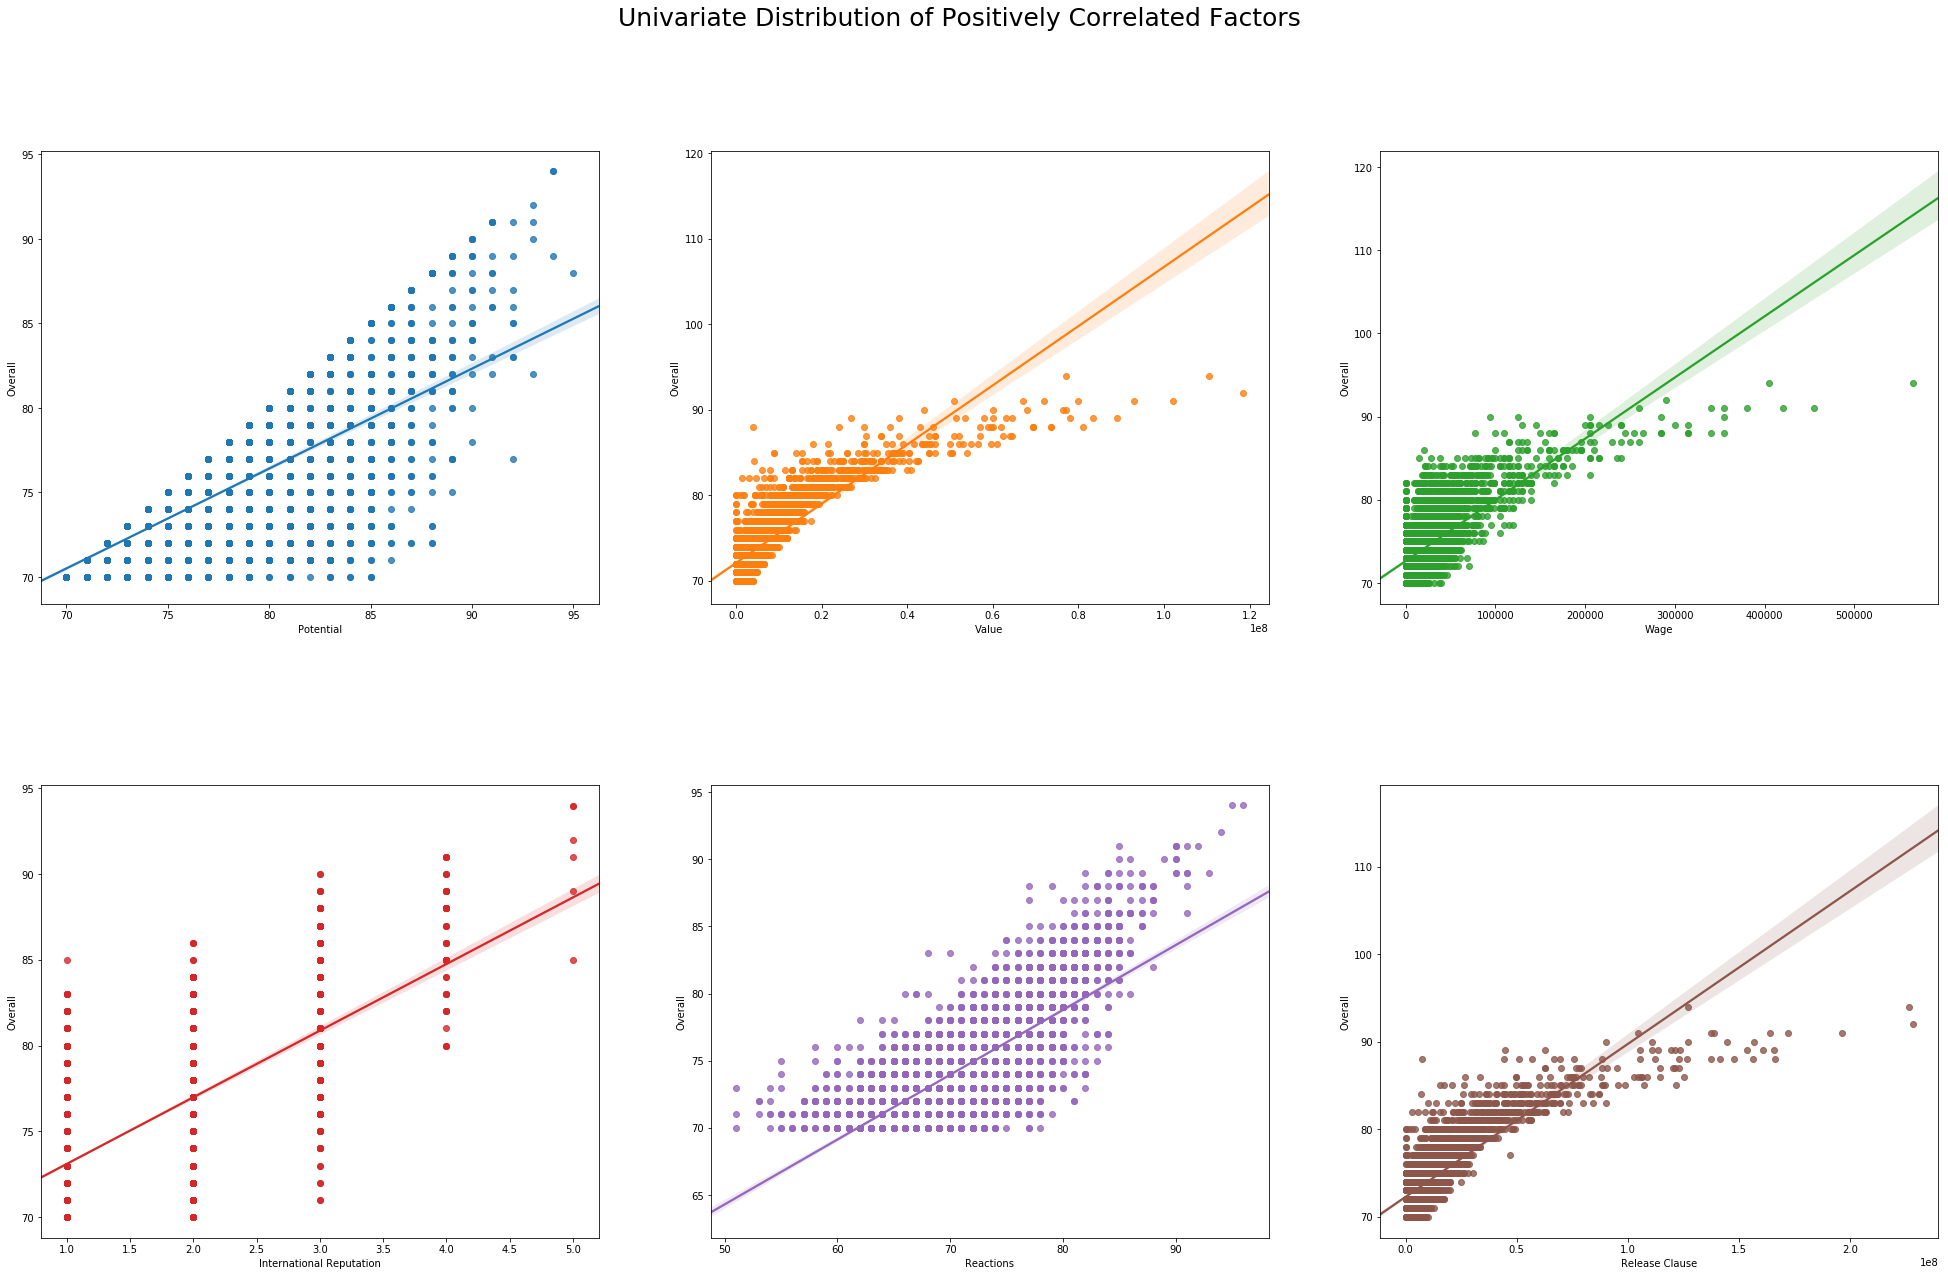

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

fifa_new_3= fifa_dataset.drop(['Age', 'Special', 'Name', 'Club', 'Body Type', 'Position', 'Work Rate' ,'GeneralPosition', 'Height', 'Weight', 'Nationality','Preferred Foot', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'PF_label','GP_Label'], axis = 1) 

z = pd.Series()
for col in fifa_new_3.columns.values[:]:
    if(col!='Overall'):
        colums=np.array(fifa_new_3[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(3):
        
        #x=z.index.values[i*3+j]
        #sns.barplot(z.index[i*3+j],z.values[i*3+j])
        #x=z.index.values[i*3+j]
        
        y_label=z.index[i*3+j]
        x_label=z[i*3+j]
        
        sns.regplot(data=fifa_new_3, x=z.index[i*3+j], y='Overall',ax=axes[i,j])


fig.suptitle('Univariate Distribution of Positively Correlated Factors', fontsize='25')
plt.show()

In [23]:
x_=fifa_data_p.drop(['Overall'],axis=1)
x_.columns

Index(['Age', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'Acceleration', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Vision', 'Penalties', 'Composure',
       'Marking', 'GKDiving'],
      dtype='object')

#  <p style="text-align: center;"> Linear Regression </p> <a id='LinearRegression'></a>
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (Factors), and the other is considered to be a dependent variable (Overall). Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. 

### Multiple Linear Regression

#### The case of multiple explanatory variable (independent variable) is called multiple linear regression.
To build a well-performing machine learning (ML) model, it is important to seperate data into training and testing dataset . Basically we are training the model on and testing it against the data that comes from the same set of target distribution. 

### Simple Linear Regression
The case of single explanatory variable (independent variable) is called single linear regression.¶  

#### We applied linear regression model on our dataset and calculated the value for Root Mean Squared Error ,Mean Squared Error(log), AIC and BIC

Root Mean Squared Error:-
Root Mean Square Error (RMSE) mathematically is the standard deviation of the residuals. Residuals is the measure of how far the data points are spreaded across the line of regression which we get by our training data set. RMSE is the measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

##### Mean Squared Error:-
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.

##### Akaike information criterion (AIC):-
The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

\begin{equation*}
AIC = 2k + n\times log(\frac {RSS}{N})       
\end{equation*}

<p style="text-align: center;">where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows</p>

##### Bayesian information criterion (BIC) :-
It is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

\begin{equation*}
BIC = {n}\cdot \ln(RSS/n) + {k}\cdot\ln(n)      
\end{equation*}

<p style="text-align: center;">where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows</p>

Lower the value of AIC and BIC means better model since both measure the loss of data while modeling data, and low value denotes less data is lost overall.

##### P-value:-
In statistics, the p-value is a function of the observed sample results (a statistic) that is used for testing a statistical hypothesis. Before the test is performed, a threshold value is chosen, called the significance level of the test, traditionally 5% or 1% and denoted as $\alpha$.

If the p-value is equal to or smaller than the significance level ($\alpha$), it suggests that the observed data are inconsistent with the assumption that the null hypothesis is true and thus that hypothesis must be rejected (but this does not automatically mean the alternative hypothesis can be accepted as true). When the p-value is calculated correctly, such a test is guaranteed to control the Type I error rate to be no greater than $\alpha$.

[Back to top](#Introduction)

#### Table Overview:- Top 5 rows of the dataset consisting of independent variables that have p-value<0.05
And we will be using the following Independent Variables present in the given dataset for modeling our data using linear regression.

In [24]:
#factors on the basis of p-value
selected_columns_1 = selected_column[0:1].values
selected_columns_2 = selected_column[2:].values
selected_columns = np.concatenate((selected_columns_1,selected_columns_2),axis=0)


def backwardelimination(x, Y, sl, columns):
    numVars = len(x[0])
    
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        
        if maxVar > sl:
            
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j,1)
                    columns = np.delete(columns, j)
                    

    regressor_OLS.summary()
    return x, columns
SL = 0.05

Y=fifa_dataset['Overall'].values
data_modeled, selected_columns = backwardelimination(x_.values,fifa_data_p['Overall'].values, SL,selected_columns )


Since we are to form 3 different linear models for our given project, it would be better if form a function for linear regression that could be utilised everytime we want to perform linear regression . Also, it makes the code less complex and easier to read.

We will also be validating our model. 
Cross Validation:- Cross Validation is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we will test our model on this sample before finalizing it.

We will be performing K-Fold Cross Validation.Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

In [25]:
def linear_regression(X,y):
#SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)

    print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
    print('r2_Square:%.2f '% r2_score(y_test, predictions))
    print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

    regressor_OLS = smf.OLS(y_train, X_train).fit()
    
    plt.figure(figsize=(18,10))
    plt.scatter(predictions,y_test,alpha = 0.3)
    plt.xlabel('Predictions')
    plt.ylabel('Overall')
    plt.title("Linear Prediction ")
    plt.show()
#cross validation    
    Kfold = KFold(len(X), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())
    z=print(regressor_OLS.summary())
    return z

   

In [26]:
####function to calculate cross validation score only
def cross_val(X,y):
    #SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    Kfold = KFold(len(X), shuffle=True)
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())

# Linear Model 1 <a id='LinearModel1'></a>
The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- Age, Potential, Special, International Reputation, Weak Foot, Skill Moves, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning,  Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, GP_Label, PF_label

>Target Feature:- Overall

[Back to top](#LinearRegression)

(1000, 43) (3999, 43) (1000,) (3999,)
r2_Square:0.90 
MSE:1.15 


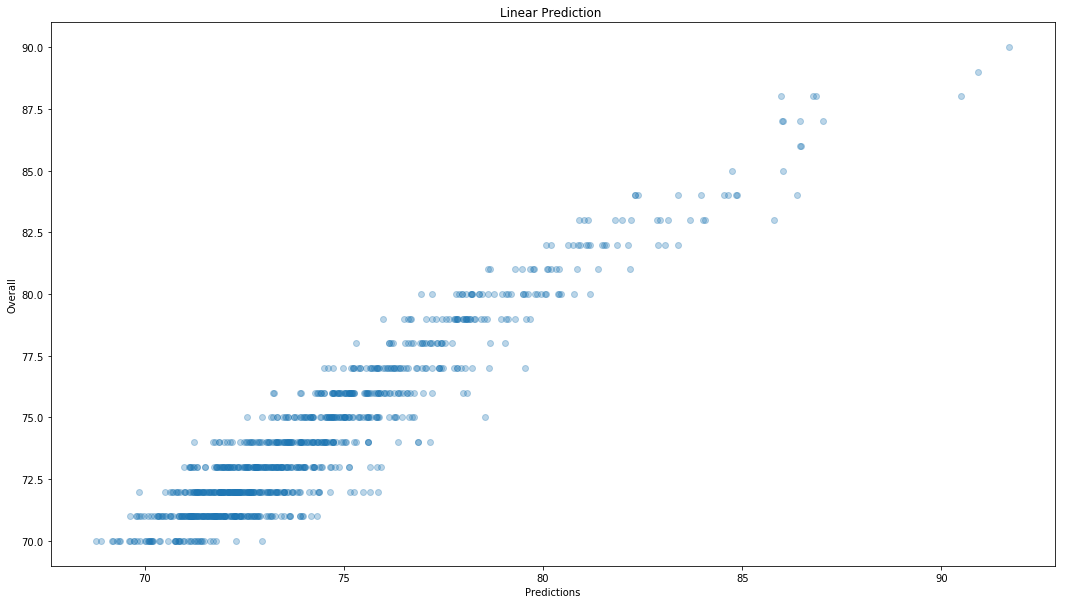

KfoldCrossVal mean score using Linear regression is 0.899172919365296
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.443e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:35:13   Log-Likelihood:                -6522.5
No. Observations:                3999   AIC:                         1.313e+04
Df Residuals:                    3957   BIC:                         1.339e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [27]:
#Linear Regression 1

X_1= fifa_dataset.drop(['Overall','Preferred Foot','Name','Nationality','Club','Work Rate','GeneralPosition','Body Type','Weight','Height','Wage','Position','Value'], axis = 1)
y_1= fifa_dataset['Overall']
linear_regression(X_1,y_1)
#SPLIT TEST AND TRAIN
#X_train, X_test, y_train, y_test = train_test_split(fifa_new_LR_1, target, test_size=0.2)

#One Hot Encoding
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)
#print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

# Linear Model 2 <a id='LinearModel2'></a>

The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- Age, Potential, Value, Special, International Reputation, Skill Moves, Crossing, Finishing, HeadingAccuracy, Volleys, Curve, LongPassing, Acceleration, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Vision, Penalties, Composure, Marking, GKDiving

>Target Feature:- Overall

[Back to top](#LinearRegression)

(1000, 27) (3999, 27) (1000, 1) (3999, 1)
r2_Square:0.90 
MSE:1.18 


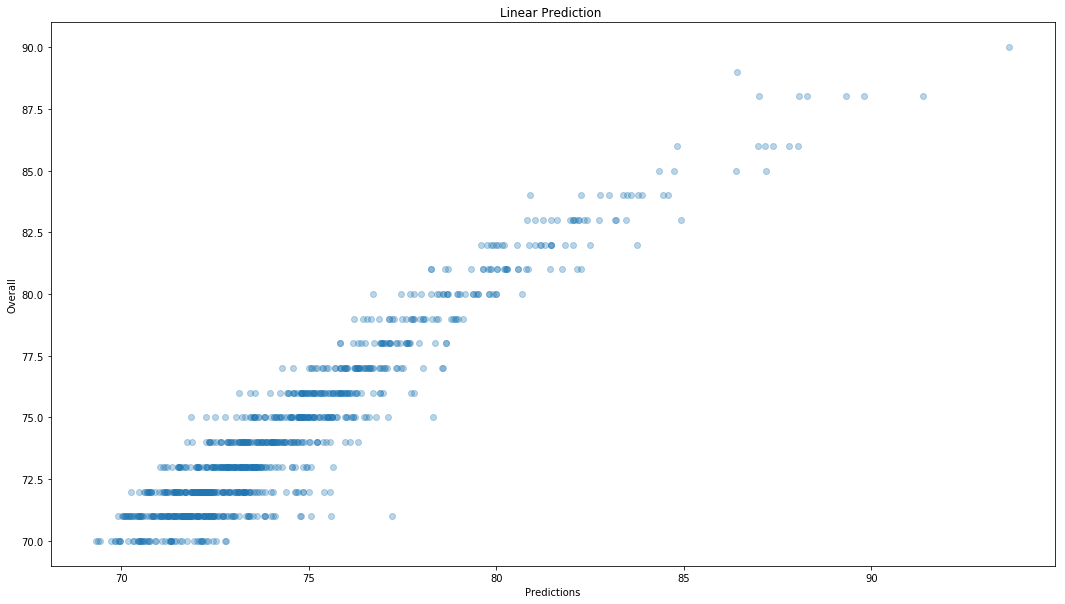

KfoldCrossVal mean score using Linear regression is 0.9008046964311364
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.344e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:35:13   Log-Likelihood:                -6532.4
No. Observations:                3999   AIC:                         1.312e+04
Df Residuals:                    3972   BIC:                         1.329e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [28]:
y_2 = pd.DataFrame()
y_2['Overall'] = fifa_dataset.iloc[:,3]
y_2.head()
X_2 = pd.DataFrame(data= data_modeled, columns = selected_columns)
X_2.head()
linear_regression(X_2,y_2)

# Linear Model 3 <a id='LinearModel3'></a>
The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- Potential, Value, Wage, International Reputation, Weak Foot, Crossing, Dribbling, Acceleration, Agility, Reactions, Balance, ShotPower, Stamina, Strength, LongShots, Penalties, Composure

>Target Feature:- Overall

[Back to top](#LinearRegression)

(1000, 17) (3999, 17) (1000,) (3999,)
r2_Square:0.87 
MSE:1.45 


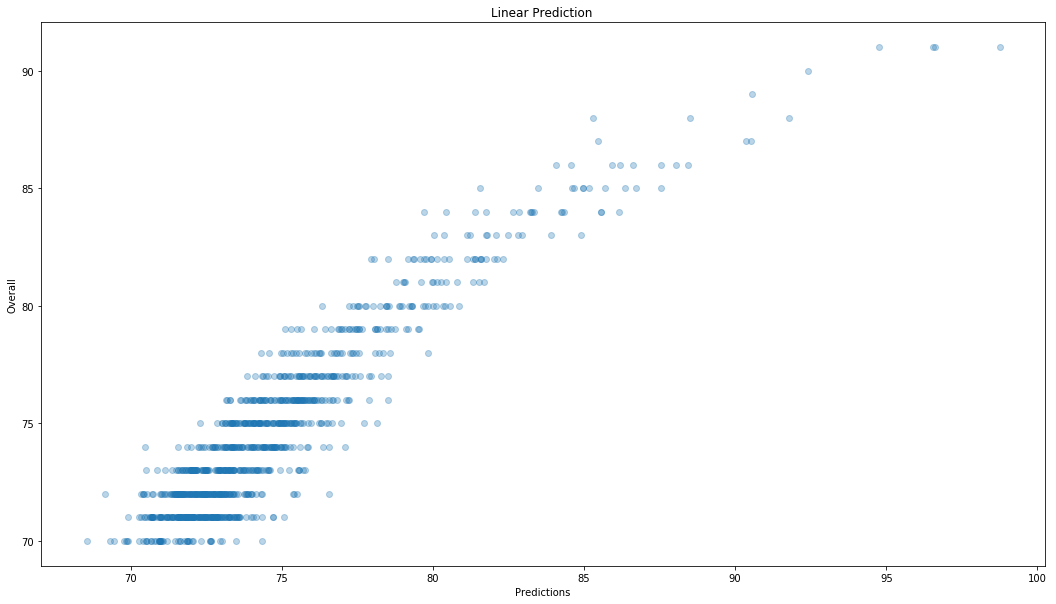

KfoldCrossVal mean score using Linear regression is 0.8485374501363866
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.476e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:35:13   Log-Likelihood:                -8318.0
No. Observations:                3999   AIC:                         1.667e+04
Df Residuals:                    3982   BIC:                         1.678e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [29]:
#Linear Regression with min p-value
X_3= fifa_dataset.drop(['Overall','Age', 'Special', 'Name', 'Club', 'Body Type', 'Position', 'Work Rate' , 'Height', 'Weight', 'Nationality','Preferred Foot', 'Skill Moves', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',  'SprintSpeed', 'Jumping',  'Aggression', 'Interceptions', 'Positioning', 'Vision',  'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'GeneralPosition', 'GP_Label', 'PF_label'], axis = 1) 
#'Potential','Value','Wage','International Reputation','Reaction','Release Clause'
y_3 = fifa_dataset['Overall']
linear_regression(X_3,y_3)

# Linear Model 4 <a id='LinearModel4'></a>

The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- Potential, Value, Wage, Special, International Reputation, Skill Moves, Crossing, Dribbling, Reactions, ShotPower, LongShots, Vision, Penalties, Composure, Release Clause, GP_Label, PF_label, InternationalReputation

>Target Feature:- Overall

[Back to top](#LinearRegression)

(1000, 17) (3999, 17) (1000,) (3999,)
r2_Square:0.86 
MSE:1.41 


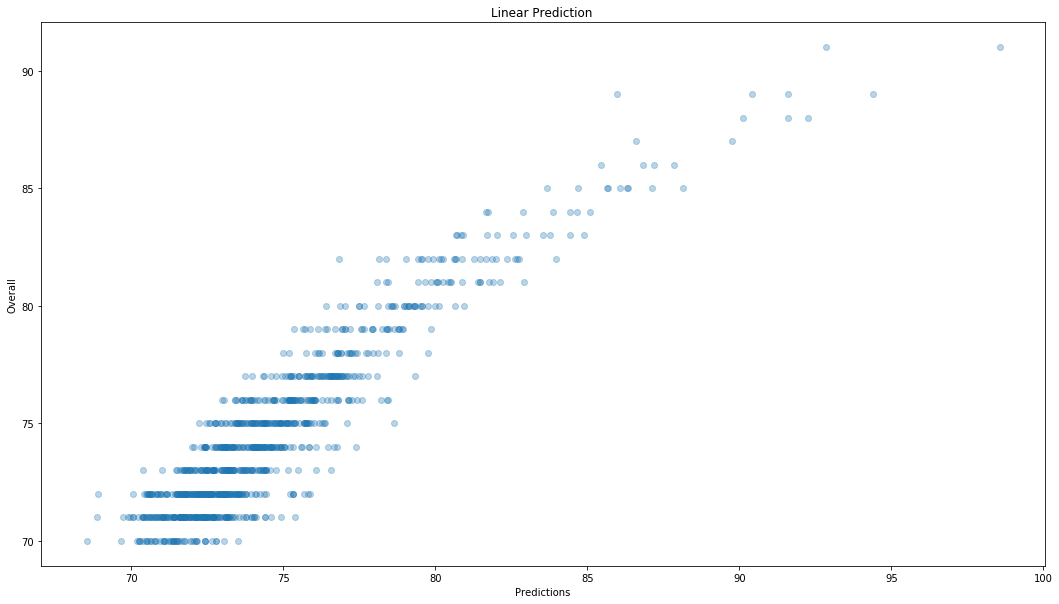

KfoldCrossVal mean score using Linear regression is 0.8524125112977943
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.351e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:35:14   Log-Likelihood:                -8392.8
No. Observations:                3999   AIC:                         1.682e+04
Df Residuals:                    3982   BIC:                         1.693e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [30]:
#Linear Regression 4

X_4= fifa_dataset.drop(['Overall','Age', 'Name', 'Club', 'Body Type', 'Position', 'Work Rate' ,'GeneralPosition', 'Height', 'Weight', 'Nationality','Preferred Foot', 'Weak Foot', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',  'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance',  'Jumping', 'Stamina', 'Strength', 'Aggression', 'Interceptions', 'Positioning',  'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis = 1) 
#'Reactions','Vision','Composure','Crossing','Dribbling','ShotPower','LongShots','Penalties','Value','Release Clause','Wage','Potential'
#'Potential','Value','Wage','International Reputation','Reaction','Release Clause'
y_4 = fifa_dataset['Overall']
linear_regression(X_4,y_4)
#SPLIT TEST AND TRAIN
#X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(fifa_new_LR_3, target, test_size=0.2)

#One Hot Encoding
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)
#print(X_test_3.shape,X_train_3.shape,y_test_3.shape,y_train_3.shape)

#### Significant Questions on the basis of the all 4 Linear Models

##### * Is the relationship significant?   

By the results of all three models we can say , that the relationship between the dependent variable (Overall) and significant independent variables(Potential, Value, Wage, Special, International Reputation, etc..) are significant. 

##### * Are any model assumptions violated?    

Assumptions for Linear Regression are as follow:-
1. Linear relationship.
2. Multivariate normality.(correlated variables do clustering around mean value)
3. No or little multicollinearity.
5. No auto-correlation.
6. Homoscedasticity.(all random variables in the sequence have the same finite variance)

by the results we can say that they have linear relationship and no auto correlation for multicollinearity and multivariate normality please refer to section [Multicollinearity](#Multicollinearity)

##### * Does the model make sense? Interpret the meaning of each independent variable.   

All four model makes sense.And we can say as the value of each independent variable we have used increase Overall will increase.

##### * Cross-validate the model. How well did it do? 

For all four models cross validation gives good result, such that it is has high accuracy score(>85%).

##### * Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
AIC, BIC and adjusted R^2  for Linear Model 2 is the lowest, lowest and highest , hence it is the the one we should choose.

#  <p style="text-align: center;"> Logistic Regression </p> <a id='LogisticRegression'></a>
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Difference between logistic and linear regression:-
In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values(discrete). Also , we use logistic for classification purpose i.e for categorical variables. and linear regression for prediction (by line of regression)


[Back to top](#Introduction)

### Box Plot of Fifa19 Dataset (Scaled)

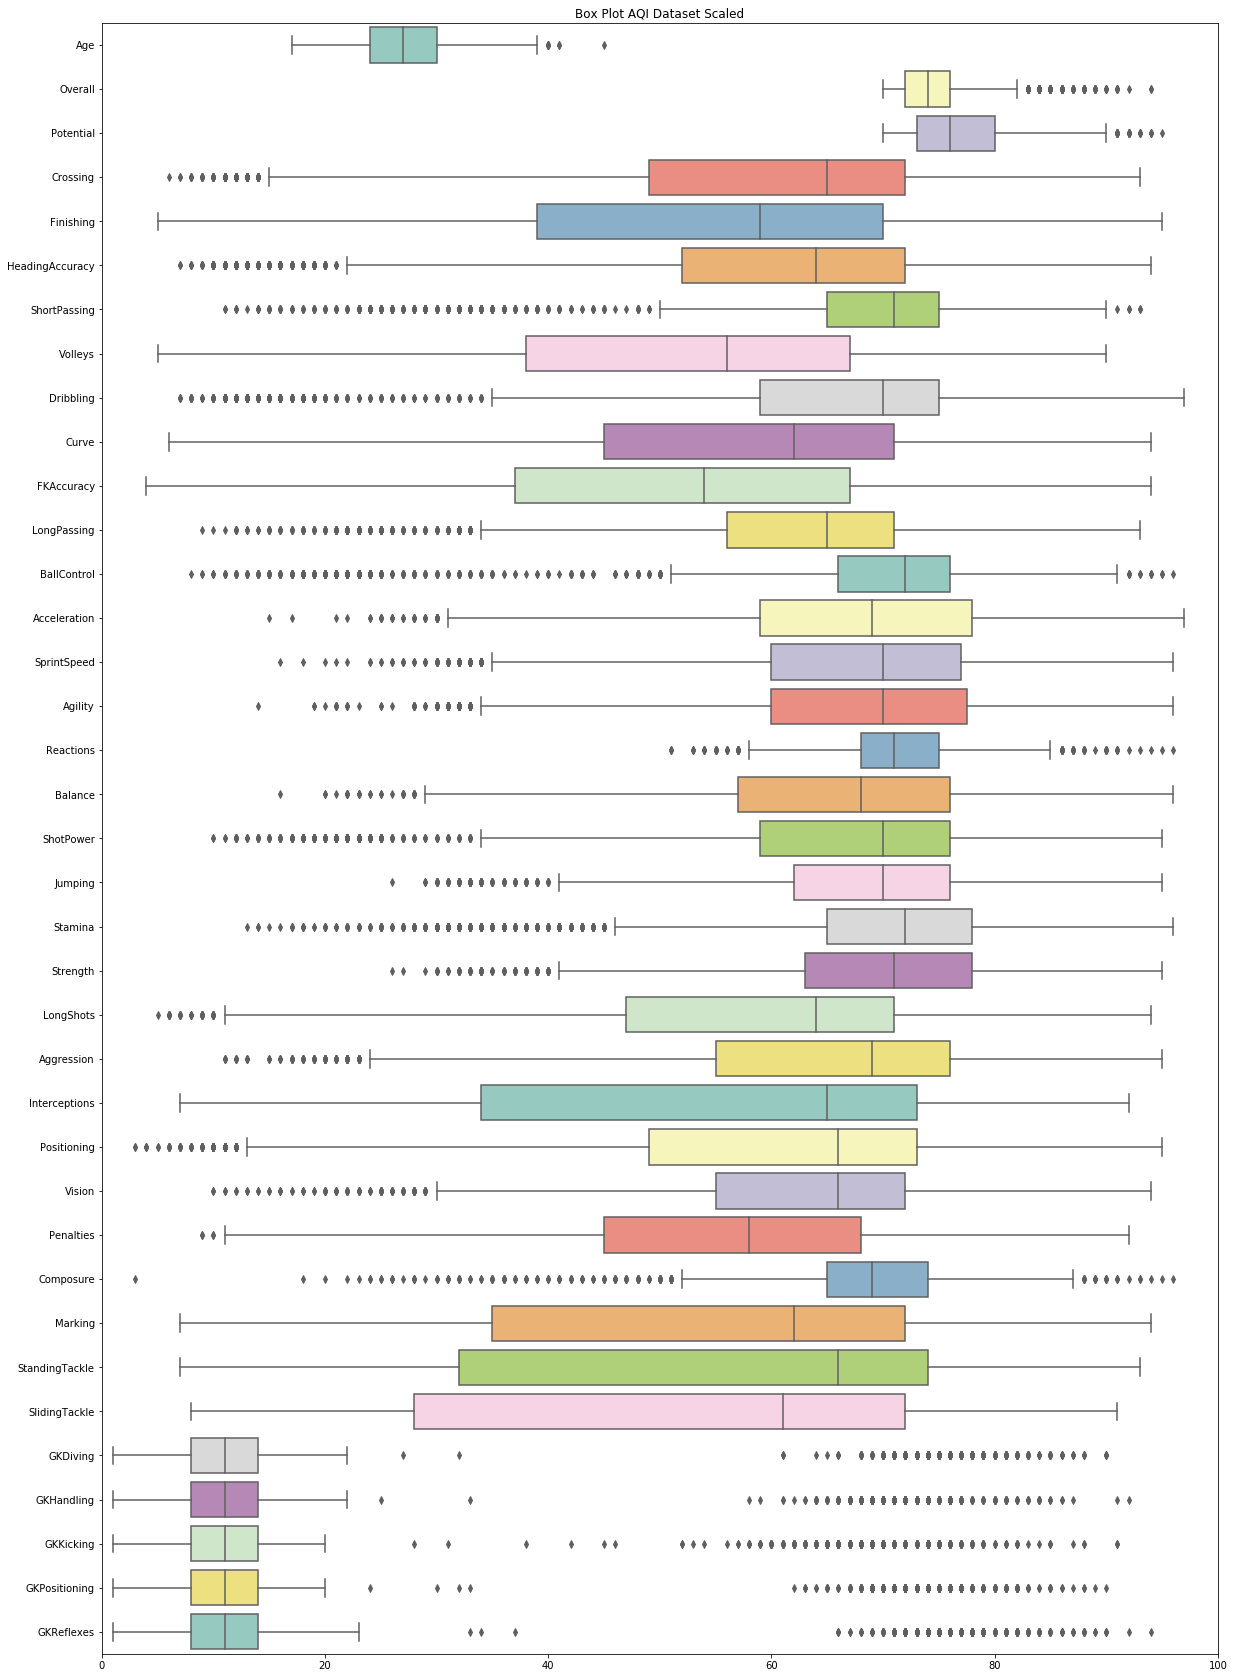

In [31]:
fifa_dataset_box=fifa_dataset.drop(['Name', 'Nationality', 'Club',  'Preferred Foot',  'Work Rate', 'Body Type', 'Position',
     'GeneralPosition', 'GP_Label', 'PF_label','Special','Value','International Reputation','Height','Weight',
       'Weak Foot', 'Skill Moves',
       'Wage', 'Release Clause'],axis=1)
f, ax = plt.subplots(figsize=(20, 30))

ax.set_facecolor('#FFFFFF')
plt.title("Box Plot AQI Dataset Scaled")
ax.set(xlim=(0, 100))
ax = sns.boxplot(data = fifa_dataset_box, 
  orient = 'h', 
  palette = 'Set3')

### Predictor Names

In [32]:
predictor_names=fifa_dataset_box.columns.get_values()
predictor_names=predictor_names.tolist()
predictor_names

['Age',
 'Overall',
 'Potential',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

### Rank Predictors

In [33]:
def rank_predictors(dat,l,f='PF_label'):
    rank={}
    max_vals=dat.max()
    mean_vals=dat.groupby(f).mean()  # We are using the mean 
    for p in l:
        score=np.abs((mean_vals[p][1]-mean_vals[p][0])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(fifa_dataset,predictor_names) 
cat_rank

{'Age': 0.01100382650371851,
 'Overall': 0.0005556606695095711,
 'Potential': 0.0007493016516871433,
 'Crossing': 0.08711633673148295,
 'Finishing': 0.020435187548122184,
 'HeadingAccuracy': 0.001403728403549232,
 'ShortPassing': 0.030843848519958354,
 'Volleys': 0.024335400357857712,
 'Dribbling': 0.051983069243931146,
 'Curve': 0.08165290926883711,
 'FKAccuracy': 0.07412767832327047,
 'LongPassing': 0.040527171112775935,
 'BallControl': 0.03731223739591257,
 'Acceleration': 0.036805526182806525,
 'SprintSpeed': 0.034699097249032494,
 'Agility': 0.033220284977464765,
 'Reactions': 0.0016316988353265078,
 'Balance': 0.02923695722429794,
 'ShotPower': 0.037317621543831676,
 'Jumping': 0.017233611960907367,
 'Stamina': 0.02468726984085438,
 'Strength': 0.022129949439272274,
 'LongShots': 0.048819953162335956,
 'Aggression': 0.007590730751353043,
 'Interceptions': 0.03263234003683526,
 'Positioning': 0.036816133237958654,
 'Vision': 0.022657992653903652,
 'Penalties': 0.021715310607980983

### Taking the top predictors based on median difference

In [34]:
# Take the top predictors based on median difference
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1],reverse= True)

ranked_predictors=[]
for f in cat_rank:
    ranked_predictors.append(f[0])
ranked_predictors



['Crossing',
 'Curve',
 'FKAccuracy',
 'Dribbling',
 'LongShots',
 'SlidingTackle',
 'LongPassing',
 'GKPositioning',
 'GKDiving',
 'GKReflexes',
 'ShotPower',
 'BallControl',
 'StandingTackle',
 'Positioning',
 'Acceleration',
 'GKHandling',
 'SprintSpeed',
 'GKKicking',
 'Agility',
 'Interceptions',
 'ShortPassing',
 'Balance',
 'Marking',
 'Stamina',
 'Volleys',
 'Vision',
 'Strength',
 'Penalties',
 'Finishing',
 'Jumping',
 'Age',
 'Aggression',
 'Composure',
 'Reactions',
 'HeadingAccuracy',
 'Potential',
 'Overall']

In [35]:
fifa_new_LG_3= fifa_dataset.drop(['Overall','Age', 'Name', 'Club', 'Body Type', 'Position', 'Work Rate' , 'Height', 'Weight', 'Nationality','Preferred Foot', 'Weak Foot', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',  'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance',  'Jumping', 'Stamina', 'Strength', 'Aggression', 'Interceptions', 'Positioning',  'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis = 1) 



Since we are to form 3 different logistic models for our given project, it would be better if form a function for logistic regression that could be utilised everytime we want to perform logistic regression . Also, it makes the code less complex and easier to read.

We will also be validating our model. Cross Validation:- Cross Validation is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we will test our model on this sample before finalizing it.

We will be performing K-Fold Cross Validation.Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model.

    
    
##### Predicting the Test set results(Classification Report - Interpreting meaning of values we get in it)
Precision – Accuracy of positive predictions.

\begin{equation*}
Precision = \frac {TP}{(TP + FP)}
\end{equation*}

FN – False Negatives

Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.

\begin{equation*}
Recall = \frac {TP}{(TP+FN)}
\end{equation*}


F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.


\begin{equation*}
F1 = \frac {2 \times(precision \times recall)}{(precision + recall)}
\end{equation*}

In [36]:
def attacking_position(x):
    if type(x) == str:
        
        if x=="GK" or x=="RCB" or x=="LCB" or x=="CB" or x=="RCB" or x=="LCB" or x=="CB" or x=="LB" or x=="RB" or x=="LDM" or x=="RDM" or x=="CDM":
            return 0
        else:
            return 1     
        
fifa_dataset['AttackingPosition'] = fifa_dataset['Position'] .apply(attacking_position)
fifa_dataset.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,GeneralPosition,GP_Label,PF_label,AttackingPosition
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,6,11,15,14,8,226500000.0,Forward,3,1,1
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,...,7,11,15,14,11,127100000.0,Striker,7,0,1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,9,9,15,15,11,228100000.0,Winger,9,0,1
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,90,85,87,88,94,138600000.0,GoalKeeper,5,0,0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,...,15,13,5,10,13,196400000.0,Central Midfielder,1,0,1


In [37]:
def logistic_regression(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    sc = StandardScaler()
    
    # Feature scaling
    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
    #Fitting logistic regression to the training set
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(x_train,y_train)
    
    
    # Logistic regression cross validation
    #Kfold = KFold(len(ranked_predictors), shuffle=False)
    
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    cvs=cross_val_score(classifier, x_train, y_train, cv=k_fold).mean()
    print("KfoldCrossVal mean score using Logistic regression is %s \n"%cvs)
    
    
    
    print("Logistic Analysis Report")
    y_pred = classifier.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(y_pred)
    print ("Accuracy Score:%.2f" % metrics.accuracy_score(y_test,classifier.predict(x_test)))
    
    
    y_pred_proba = classifier.predict_proba(x_test)[::,1]
    print('Probabilty of dependent variable')
    print(y_pred_proba.mean())
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
# Predicting the Test set results
#Precision – Accuracy of positive predictions.
#Precision = TP/(TP + FP)

#FN – False Negatives
#Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.
#Recall = TP/(TP+FN)

#F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
#F1 = 2 x (precision x recall)/(precision + recall)


## Reviewing the dataset for Logistic Regression

In [38]:
def logit_summary(y,X):
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print("Model Summary")
    print(result.summary2())

In [39]:
fifa_log = fifa_dataset.drop(['Club','Preferred Foot','GeneralPosition','Work Rate','Body Type','Position','Height', 'Weight'],axis=1)
fifa_log.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,GP_Label,PF_label,AttackingPosition
0,L. Messi,31,Argentina,94,94,110500000.0,565000.0,2202,5,4,...,26,6,11,15,14,8,226500000.0,3,1,1
1,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,405000.0,2228,5,4,...,23,7,11,15,14,11,127100000.0,7,0,1
2,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,2143,5,5,...,33,9,9,15,15,11,228100000.0,9,0,1
3,De Gea,27,Spain,91,93,72000000.0,260000.0,1471,4,3,...,13,90,85,87,88,94,138600000.0,5,0,0
4,K. De Bruyne,27,Belgium,91,92,102000000.0,355000.0,2281,4,5,...,51,15,13,5,10,13,196400000.0,1,0,1


# Logistic Model 1 <a id='LogisticModel1'></a>

The Following plot gives us our first Logistic Model along with the summary for the same.

>Training Features :- Special, International Reputation, Weak Foot, Skill Moves, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause

>Target Feature:- Preferred Foot

[Back to top](#LogisticRegression)

KfoldCrossVal mean score using Logistic regression is 0.7708720142602494 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       971
           1       0.59      0.21      0.31       279

   micro avg       0.79      0.79      0.79      1250
   macro avg       0.70      0.58      0.59      1250
weighted avg       0.76      0.79      0.75      1250

[0 0 0 ... 0 0 0]
Accuracy Score:0.79
Probabilty of dependent variable
0.24996055805783113


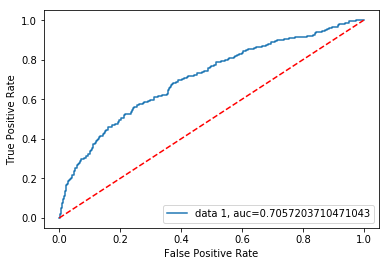

         Current function value: 0.492972
         Iterations: 35
Model Summary
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.109      
Dependent Variable:    PF_label           AIC:                5004.7384  
Date:                  2019-02-25 23:35   BIC:                5252.3842  
No. Observations:      4999               Log-Likelihood:     -2464.4    
Df Model:              37                 LL-Null:            -2766.6    
Df Residuals:          4961               LLR p-value:        1.0025e-103
Converged:             0.0000             Scale:              1.0000     
No. Iterations:        35.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Special                   0.0007      nan      nan    nan     

In [40]:
x=fifa_log.iloc[:,7:46]
#w=fifa_log.iloc[:,47]
#z.insert(loc=39, column='PF_label', value=w)

y=fifa_log.iloc[:,47]
logistic_regression(x,y)
logit_summary(y,x)

# Logistic Model 2 <a id='LogisticModel2'></a>

The Following plot gives us our second Logistic Model along with the summary for the same.

>Training Features :- Special, International Reputation, Weak Foot, Skill Moves, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause

>Target Feature:- Attacking Position

[Back to top](#LogisticRegression)

KfoldCrossVal mean score using Logistic regression is 0.9189155080213904 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       593
           1       0.94      0.91      0.92       657

   micro avg       0.92      0.92      0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250

[0 0 1 ... 1 0 1]
Accuracy Score:0.92
Probabilty of dependent variable
0.51506941256724


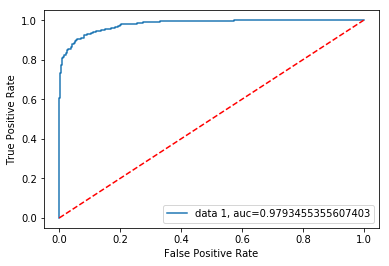

         Current function value: 0.187071
         Iterations: 35
Model Summary
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:     0.730    
Dependent Variable:      AttackingPosition     AIC:                  1946.3314
Date:                    2019-02-25 23:35      BIC:                  2193.9772
No. Observations:        4999                  Log-Likelihood:       -935.17  
Df Model:                37                    LL-Null:              -3464.0  
Df Residuals:            4961                  LLR p-value:          0.0000   
Converged:               0.0000                Scale:                1.0000   
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------------------
Spec

In [41]:
x=fifa_log.iloc[:,7:46]
#w=fifa_log.iloc[:,47]
#x.insert(loc=39, column='PF_label', value=w)
y=fifa_log.iloc[:,48]
logistic_regression(x,y)
logit_summary(y,x)

# Logistic Model 3 <a id='LogisticModel3'></a>
The Following plot gives us our third Logistic Model along with the summary for the same.

>Training Features :- Special, International Reputation, Weak Foot, Skill Moves, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause

>Target Feature:- Attacking Position

[Back to top](#LogisticRegression)

KfoldCrossVal mean score using Logistic regression is 0.7583365418894831 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       971
           1       0.48      0.11      0.18       279

   micro avg       0.78      0.78      0.78      1250
   macro avg       0.64      0.54      0.53      1250
weighted avg       0.72      0.78      0.72      1250

[0 0 0 ... 0 0 0]
Accuracy Score:0.78
Probabilty of dependent variable
0.24948385909928367


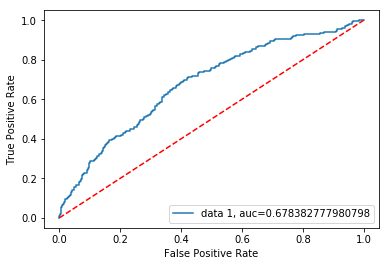

Optimization terminated successfully.
         Current function value: 0.508347
         Iterations 6
Model Summary
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.081     
Dependent Variable: PF_label         AIC:              5156.4541 
Date:               2019-02-25 23:35 BIC:              5397.5828 
No. Observations:   4999             Log-Likelihood:   -2541.2   
Df Model:           36               LL-Null:          -2766.6   
Df Residuals:       4962             LLR p-value:      4.0373e-73
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               -0.0374   0.0140 -2.6749 0.0075 -0.0648 -0.0100
Overall            0.0234   0.0251  0.9318 0.3514 -0

In [42]:
x=fifa_log[predictor_names]
y=fifa_log.iloc[:,47]
logistic_regression(x,y)
logit_summary(y,x)

#  <p style="text-align: center;"> Multicollinearity </p> <a id='Multicollinearity'></a>
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Why Multicollinearity is a problem?
>Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

VIF assesses whether factors are correlated to each other (multicollinearity)
High variance inflation factor means that they "have" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.
If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. If the VIF for a factor is near or above 5 we may have to remove highly correlated factors.

[Back to top](#Introduction)

In [43]:
## high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables before 
#moving on to model building or risk building a model with high multicolinearity.
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif


### VIF of Linear Model 1 Independant variables

In [44]:
variance_IF(X_1)

,VIF Factor,features
0,89.354289,Age
1,542.281617,Potential
2,inf,Special
3,10.457242,International Reputation
4,25.424132,Weak Foot
5,58.066798,Skill Moves
6,inf,Crossing
7,inf,Finishing
8,inf,HeadingAccuracy
9,inf,ShortPassing


### VIF of Linear Model 2 Independant variables

In [45]:
variance_IF(X_2)

,VIF Factor,features
0,84.624886,Age
1,446.278385,Potential
2,3.671884,Value
3,6859.571176,Special
4,10.872078,International Reputation
5,52.132235,Skill Moves
6,86.888865,Crossing
7,83.798395,Finishing
8,70.059447,HeadingAccuracy
9,61.030685,Volleys


### VIF of Linear Model 3 Independant variables

In [46]:
variance_IF(X_3)

,VIF Factor,features
0,290.175338,Potential
1,5.867018,Value
2,5.191293,Wage
3,10.607218,International Reputation
4,23.978411,Weak Foot
5,46.906285,Crossing
6,111.066742,Dribbling
7,87.887373,Acceleration
8,126.194175,Agility
9,260.445382,Reactions


### VIF of Linear Model 4 Independant variables

In [47]:
variance_IF(X_4)

,VIF Factor,features
0,258.338155,Potential
1,61.906432,Value
2,5.242861,Wage
3,532.234030,Special
4,10.216610,International Reputation
5,51.907345,Skill Moves
6,60.785205,Crossing
7,127.617999,Dribbling
8,286.596591,Reactions
9,100.723546,ShotPower


#### Significant Questions on the basis of the all 3 Linear Models
##### * Is there any multi-colinearity in the model?   

Yes there is very high multicollinearity in all models  .(based on VIF values calculated)

##### * In the multiple regression models are predictor variables independent of all the other predictor variables?  
For Model 1:- Most independant variables have very high VIF, thus they are not independent of all the other predictor variables, since the calculated VIF value is greater than 5.

For Model 2:- All the independant variables have very high VIF although there are no infinite values in this

For Model 3:- The model is somewhat good, although the VIF values are still very high

Fore Model 4:- This model has a couple of values with low VIF, but still, most values are very very high.

##### * In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 

The regular regression coefficients that we see in statistical output describe the relationship between the independent variables and the dependent variable. The coefficient value represents the mean change of the dependent variable given a one-unit shift in an independent variable Consequently, we might feel that we can use the absolute sizes of the coefficients to identify the most important variable. After all, a larger coefficient signifies a greater change in the mean of the independent variable. However, the independent variables can have dramatically different types of units, which make comparing the coefficients meaningless.

Calculations for p-values include various properties of the variable, but importance is not one of them. A very small p-value does not indicate that the variable is important in a practical sense. 

We have already excluded the variables in the previous answer and about ranking the significant variables. Output for stepwise regression gives us the important variables. [Stepwise Regression](#StepwiseRegression)

##### * Cross-validate the models. How well did they do?   

In [48]:
#Linear Model 1:-
##X_M1=X_1[[]]
print('Linear Model 1')
cross_val(X_1,y_1)

Linear Model 1
KfoldCrossVal mean score using Linear regression is 0.898388092556597


In [49]:
#Linear Model 2:-
print('Linear Model 2')
cross_val(X_2,y_2)

Linear Model 2
KfoldCrossVal mean score using Linear regression is 0.9014742032737264


In [50]:
#Linear Model 3:-
print('Linear Model 3')
cross_val(X_3,y_3)

Linear Model 3
KfoldCrossVal mean score using Linear regression is 0.8524226327826563


In [51]:
#Linear Model 4:-
##X_M1=X_1[[]]
print('Linear Model 1')
cross_val(X_4,y_4)

Linear Model 1
KfoldCrossVal mean score using Linear regression is 0.8491650621807766


#  <p style="text-align: center;"> Stepwise Regression </p> <a id='StepwiseRegression'></a>
Stepwise regression is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. (p-value in our case). 

>BACKWARD STEPWISE REGRESSION is a stepwise regression approach, that begins with a full model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

>FORWARD STEPWISE REGRESSION is a type of stepwise regression which begins with an empty model and adds in variables one by one. ... It is one of two commonly used methods of stepwise regression; the other is backward elimination, and is almost opposite.Se

[Back to top](#Introduction)

In [52]:
#https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm

#X=fifa_dataset.drop(['date','state', 'location', 'type','AQI_Range'],axis=1)
X=X_1.astype(float)
y=fifa_dataset['Overall']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:',result)



Add  Reactions                      with p-value 0.0
Add  International Reputation       with p-value 0.0
Add  Release Clause                 with p-value 0.0
Add  Potential                      with p-value 1.76927e-232
Add  Age                            with p-value 0.0
Add  Stamina                        with p-value 4.79002e-14
Add  GKDiving                       with p-value 1.04822e-22
Add  Special                        with p-value 6.51838e-16
Add  HeadingAccuracy                with p-value 4.32327e-25
Add  Balance                        with p-value 7.68878e-09
Add  SprintSpeed                    with p-value 7.74399e-16
Add  ShortPassing                   with p-value 3.00523e-14
Add  Positioning                    with p-value 2.08302e-10
Add  Composure                      with p-value 7.82266e-11
Add  GKHandling                     with p-value 2.16615e-08
Add  ShotPower                      with p-value 6.48198e-06
Add  GP_Label                       with p-value 3.8344

(1000, 22) (3999, 22) (1000,) (3999,)
r2_Square:0.91 
MSE:1.15 


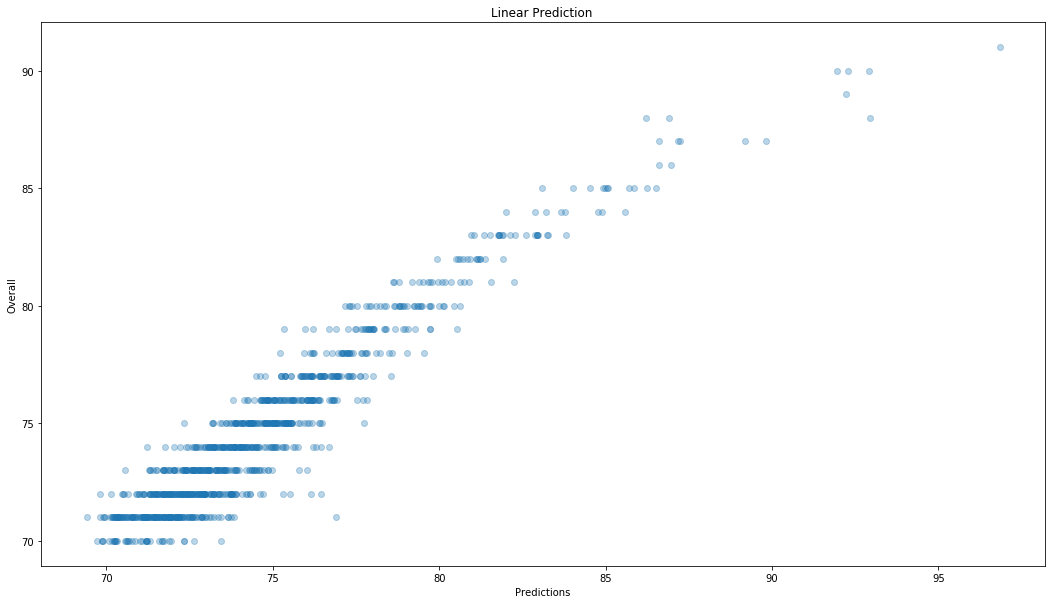

KfoldCrossVal mean score using Linear regression is 0.8975001936368725
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.427e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:35:23   Log-Likelihood:                -6572.5
No. Observations:                3999   AIC:                         1.319e+04
Df Residuals:                    3977   BIC:                         1.333e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [53]:
StepwiseCrossValidate=fifa_dataset[['Reactions', 'Release Clause', 'International Reputation', 'Potential', 'Age', 'Stamina', 'GKDiving', 'Special', 'HeadingAccuracy', 'Balance', 'SprintSpeed', 'ShortPassing', 'Positioning', 'Composure', 'GKHandling', 'ShotPower', 'GP_Label', 'BallControl', 'Vision', 'GKPositioning', 'Skill Moves', 'LongShots']]
target=fifa_dataset['Overall']
linear_regression(StepwiseCrossValidate,target)

#  <p style="text-align: center;"> Interaction Effect </p> <a id='InteractionEffect'></a>
Interaction effects occur when the effect of one variable depends on the value of another variable. Interaction effects are common in regression analysis. In any study, many variables can affect the outcome. Changing these variables can affect the outcome directly. In more complex study areas, the independent variables might interact with each other. Interaction effects indicate that a third variable influences the relationship between an independent and dependent variable. This type of effect makes the model more complex, but if the real world behaves this way, it is critical to incorporate it in your model. 

Here we are taking 3 independant variables and seeing their individual standard error, t score and P values, and these values in presence of each other. And finally we see interaction of age and potential. The 3 independent variables are Age, International Reputation and Potential

[Back to top](#Introduction)

# All Columns <a id='AllColumns'></a>

[Back to top](#InteractionEffect)

In [54]:
def evaluateModel (model):
    print("RSS = ", ((fifa_dataset.Overall - model.predict())**2).sum())
    print("R2 = ", model.rsquared)
    
fifa_dataset['InternationalReputation']=fifa_dataset['International Reputation']
modelAll = smf.ols('Overall ~ Age + InternationalReputation + Potential', fifa_dataset).fit()
print(modelAll.summary().tables[1])
evaluateModel (modelAll)

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.8714      0.701     11.230      0.000       6.497       9.245
Age                         0.3994      0.008     49.228      0.000       0.383       0.415
InternationalReputation     1.3073      0.046     28.484      0.000       1.217       1.397
Potential                   0.7025      0.007     95.091      0.000       0.688       0.717
RSS =  12558.782331978779
R2 =  0.8199453599070381


# International Reputation <a id='InternationalReputation'></a>

[Back to top](#InteractionEffect)

In [55]:
modelIntR = smf.ols('Overall ~ InternationalReputation', fifa_dataset).fit()
print(modelIntR.summary().tables[1])
evaluateModel (modelIntR)

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  69.2249      0.089    774.118      0.000      69.050      69.400
InternationalReputation     3.8829      0.058     66.581      0.000       3.769       3.997
RSS =  36960.456602862105
R2 =  0.47009976481921245


# Age <a id='Age'></a>

[Back to top](#InteractionEffect)

In [56]:
modelAge = smf.ols('Overall ~ Age', fifa_dataset).fit()
print(modelAge.summary().tables[1])
evaluateModel (modelAge)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.9811      0.359    206.054      0.000      73.277      74.685
Age            0.0227      0.013      1.743      0.081      -0.003       0.048
RSS =  69707.47969334843
R2 =  0.0006073171589296988


# Potential <a id='Potential'></a>

[Back to top](#InteractionEffect)

In [57]:
modelPot = smf.ols('Overall ~ Potential', fifa_dataset).fit()
print(modelPot.summary().tables[1])
evaluateModel (modelPot)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1329      0.586     49.752      0.000      27.985      30.281
Potential      0.5911      0.008     77.789      0.000       0.576       0.606
RSS =  31547.22398687808
R2 =  0.5477090126464192


## International Reputation and Age <a id='InternationalReputation&Age'></a>

[Back to top](#InteractionEffect)

In [58]:
modelIntRAge = smf.ols('Overall ~ InternationalReputation + Age', fifa_dataset).fit()
print(modelIntRAge.summary().tables[1])
evaluateModel (modelIntRAge)

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  72.9205      0.256    284.900      0.000      72.419      73.422
InternationalReputation     4.1129      0.059     69.796      0.000       3.997       4.228
Age                        -0.1474      0.010    -15.362      0.000      -0.166      -0.129
RSS =  35293.395852159796
R2 =  0.4940003322107259


# International Reputation and Potential <a id='InternationalReputation&Potential'></a>

[Back to top](#InteractionEffect)

In [59]:
modelIntRPot = smf.ols('Overall ~ InternationalReputation + Potential', fifa_dataset).fit()
print(modelIntRPot.summary().tables[1])
evaluateModel (modelIntRPot)

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  36.7228      0.468     78.392      0.000      35.804      37.641
InternationalReputation     2.6468      0.045     58.771      0.000       2.559       2.735
Potential                   0.4448      0.006     70.029      0.000       0.432       0.457
RSS =  18651.90616154205
R2 =  0.7325885454346428


# Age and Potential <a id='Age&Potential'></a>

[Back to top](#InteractionEffect)

In [60]:
modelAgePot = smf.ols('Overall ~ Age + Potential', fifa_dataset).fit()
print(modelAgePot.summary().tables[1])
evaluateModel (modelAgePot)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4573      0.594     -7.500      0.000      -5.622      -3.292
Age            0.5364      0.007     76.159      0.000       0.523       0.550
Potential      0.8378      0.006    137.330      0.000       0.826       0.850
RSS =  14598.721945093275
R2 =  0.7906988467386842


# Age and Potential Interaction <a id='Age&PotentialInteraction'></a>

[Back to top](#InteractionEffect)

In [61]:
modelAgePot = smf.ols('Overall ~ Age + Potential + Age*Potential', fifa_dataset).fit()
print(modelAgePot.summary().tables[1])
evaluateModel (modelAgePot)

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        99.7634      2.268     43.981      0.000      95.316     104.210
Age              -3.3569      0.083    -40.492      0.000      -3.519      -3.194
Potential        -0.5010      0.029    -17.344      0.000      -0.558      -0.444
Age:Potential     0.0503      0.001     47.080      0.000       0.048       0.052
RSS =  10111.735682559065
R2 =  0.8550285464855679


#  <p style="text-align: center;"> Regularization </p> <a id='Regularization'></a>
Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights

Is there collinearity among some features? L2 regularization can improve prediction quality in this case, as implied by its alternative name, "ridge regression." However, it is true in general that either form of regularization will improve out-of-sample prediction, whether or not there is multicollinearity and whether or not there are irrelevant features, simply because of the shrinkage properties of the regularized estimators. L1 regularization can't help with multicollinearity it will just pick the feature with the largest correlation to the outcome  (which isn't useful if you have an interest in estimating coefficients for all features which are strongly correlated with your target). Ridge regression can obtain coefficient estimates even when you have more features than examples... but the probability that any will be estimated precisely at 0 is 0.

[Back to top](#Introduction)

(1000, 43) (3999, 43) (1000,) (3999,)
r2_Square:0.89 
MSE:1.25 


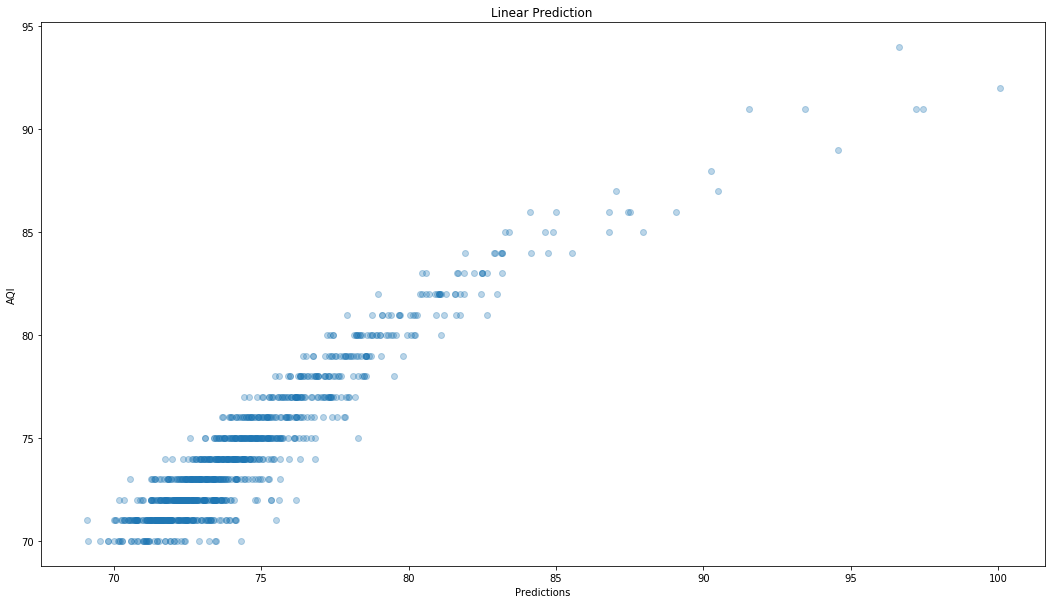

KfoldCrossVal mean score using Linear regression is 0.8986120980386578


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.496e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:35:23   Log-Likelihood:                -6489.0
No. Observations:                3999   AIC:                         1.306e+04
Df Residuals:                    3957   BIC:                         1.333e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.4025      0.007     59.761      0.000       0.389       0.416
Potential                    0.5542      0.006     94.519      0.000       0.543       0.566
Special                      0.0099      0.000     32.400      0.000       0.009       0.010
International Reputation     0.2826      0.041      6.847      0.000       0.202       0.363
Weak Foot                    0.0239      0.031      0.775      0.438      -0.037       0.084
Skill Moves                  0.1120      0.051      2.181      0.029       0.011       0.213
Crossing                    -0.0113      0.003     -4.123      0.000      -0.017      -0.006
Finishing                   -0.0068      0.003     -2.095      0.036      -0.013      -0.000
HeadingAccuracy              0.0119      0.003      4.616      0.000       0.007       0.017
ShortPassing                 0.0310      0.005      5.746      0.000       0.020       0.042
Volleys                     -0.0119      0.003     -4.483      0.000      -0.017      -0.007
Dribbling                   -0.0119      0.005     -2.552      0.011      -0.021      -0.003
Curve                       -0.0099      0.003     -3.559      0.000      -0.015      -0.004
FKAccuracy                  -0.0007      0.002     -0.317      0.751      -0.005       0.004
LongPassing                 -0.0074      0.004     -2.076      0.038      -0.014      -0.000
BallControl                  0.0195      0.006      3.423      0.001       0.008       0.031
Acceleration                 0.0020      0.004      0.476      0.634      -0.006       0.010
SprintSpeed                  0.0118      0.004      3.143      0.002       0.004       0.019
Agility                     -0.0076      0.003     -2.280      0.023      -0.014      -0.001
Reactions                    0.0903      0.005     17.708      0.000       0.080       0.100
Balance                     -0.0162      0.003     -5.855      0.000      -0.022      -0.011
ShotPower                    0.0052      0.003      1.667      0.095      -0.001       0.011
Jumping                     -0.0095      0.002     -4.555      0.000      -0.014      -0.005
Stamina                      0.0055      0.003      2.103      0.036       0.000       0.011
Strength                     0.0070      0.003      2.604      0.009       0.002       0.012
LongShots                   -0.0178      0.003     -5.517      0.000      -0.024      -0.011
Aggression                  -0.0083      0.002     -3.809      0.000      -0.013      -0.004
Interceptions               -0.0134      0.003     -4.230      0.000      -0.020      -0.007
Positioning                 -0.0219      0.003     -6.500      0.000      -0.029      -0.015
Vision                      -0.0209      0.003     -7.034      0.000      -0.027      -0.015
Penalties     

In [62]:
#Ridge

X_train, X_test, y_train, y_test = train_test_split(X_1,y_1, test_size=0.2)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
print('r2_Square:%.2f '% r2_score(y_test, pred))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, pred)))

regressor_OLS = smf.OLS(y_train, X_train).fit()

plt.figure(figsize=(18,10))
plt.scatter(pred,y_test,alpha = 0.3)
plt.xlabel('Predictions')
plt.ylabel('AQI')
plt.title("Linear Prediction ")
plt.show()
#cross validation    
Kfold = KFold(len(X_1), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(ridgeReg,X_train,y_train,cv=10).mean())


regressor_OLS.summary()



In [63]:
#Lasso
#X_train, X_test, y_train, y_test = train_test_split(X_3,y_3, test_size=0.2)
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

#lassoReg = Lasso(alpha=0.3, normalize=True)
#lassoReg.fit(X_train,y_train)

#print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
#print('r2_Square:%.2f '% r2_score(y_test, pred))
#print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, pred)))

#regressor_OLS = smf.OLS(y_train, X_train).fit()

#plt.figure(figsize=(18,10))
#plt.scatter(pred,y_test,alpha = 0.3)
#plt.xlabel('Predictions')
#plt.ylabel('AQI')
#plt.title("Linear Prediction ")
#plt.show()
#cross validation    
#Kfold = KFold(len(X_1), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
#print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(lassoReg,X_train,y_train,cv=10).mean())


#regressor_OLS.summary()

# <p style="text-align: center;">Conclusion<p><a id='Conclusion'></a>
    
1. On the basis of AIC, BIC and R^2 value for linear regression, we can say that Model 2 is the best, since it has the best values.
2. Overall is highly correlated with most of the independent variables(since overall is an average of all the fields)
3. Generally players with high Wage, Value, Release Clause and International Reputation have high overall.
4. Other factors that affect the Overall are dependant on the position.(i.e. A goalkeeper will have a high overall if their goalkeeping stats are high and so on..)
5. In logistic regression, we have tried predicting the PF_Label(Preferred Foot) in model 1 & 3, and Attacking Position in model 2. We can say that predicting whether the player is pkaying in an attacking position or not, based on the factors is easier rather than predicting which footed the player is.
6. The dataset has very high multicollinearity and thus high VIF, that makes sense because the independent variables are somehat reliant on one other.
7. Selecting features just on the basis of and regular regression coefficients and p-value doesn't give very good models.
8. Our dataset also contains multicollinearity, all the independent variables are somewhat related to each other as we can see in our results.
9. After concluding that Multicollinearity does exist in our dataset, and when we try to remove highly multicollinear variables the value of R^2 drops , thus making us conclude that our dataset is not fit for both linear regression and logistic regression (because assumptions for same are violated).
10. After stepwise regression, we conclude that the most significant variables that should be used for regression with our dependent variable are 'Potential', 'Age', 'Release Clause', 'Reactions', 'International Reputation', 'Stamina', 'GKDiving', 'Special', 'HeadingAccuracy', 'Balance', 'SprintSpeed', 'ShortPassing', 'Positioning', 'Composure', 'GKHandling', 'ShotPower', 'GP_Label', 'BallControl', 'Vision', 'GKPositioning', 'Skill Moves', 'LongShots' (with p-value < 0.05).
11. Regularization as such as no effect on the model, though there is a slight increase in the accuracy and cross_val_score but it is not that big that we should do it.
12. Interaction effect for (age*potential) is maximum and that we have utilised and and has gotten good R^2 value

[Back to top](#Introduction)

# <p style="text-align: center;">Contribution<p><a id='Contribution'></a>
As this was a learning assignment, the majority of the code has been taken from the GitHub account of the professor Nik Brown.
    
- Code by self : 65%
- Code from external Sources : 35%

[Back to top](#Introduction)

# <p style="text-align: center;">Citation<p><a id='Citation'></a>
1. https://github.com/nikbearbrown/INFO_6105/tree/master/Week_2 - GitHub Account of Professor 
   <a id="Reference Link 1"></a>
2. https://www.kaggle.com/karangadiya/fifa19 - Kaggle Kernel on the same dataset
   <a id="Reference Link 2"></a>
3. https://www.youtube.com/watch?v=E5RjzSK0fvY&t=394s - Youtube video of Linear Regression
   <a id="Reference Link 3"></a>
4. https://www.youtube.com/watch?v=E5RjzSK0fvY&t=396s - Youtube video of Logistic Regression
   <a id="Reference Link 4"></a>
5. http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/ - F-Score, Precision
   <a id="Reference Link 5"></a>
6. https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm - Stepwise Regression
   <a id="Reference Link 6"></a>
7. https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ - Ridge and Lasso Regression
   <a id="Reference Link 7"></a>
8. https://www.kaggle.com/marcogdepinto/feature-engineering-eda-data-cleaning-tutorial - Interaction Effect
   <a id="Reference Link 8"></a>

[Back to top](#Introduction)

# <p style="text-align: center;">License<p><a id='License'></a>
Copyright (c) 2019 Rushabh Nisher

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[Back to top](#Introduction)